# Portfolio Analysis of Real Estate sector

### Stocks under observation:

    - Vornado Realty Trust (NYSE: VNO)
    - Simon Property Group Inc. (NYSE: SPG)
    - Host Hotels & Resorts Inc. (NYSE: HST)
    - BROOKFIELD PROPERTY (NYSE: BPY)
    - HOWARD HUGHES CORP. (NYSE: HHC)
    - ZILLOW GROUP (NYSE: Z) 



In [14]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb
import scipy.optimize as sco
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Pulling stock data 

In [15]:
estate = ['VNO', 'SPG', 'HST', 'BPY','HHC', 'Z' ]
data = pd.DataFrame()
for i in range(len(estate)):
    
    df = wb.DataReader(estate[i], data_source='yahoo', start='2020-1-1')
    df['stock'] = estate[i]
    data = data.append(df[['Adj Close', 'stock']])

table = data.pivot(columns='stock')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

,BPY,HHC,HST,SPG,VNO,Z
Date,,,,,,
2020-01-02,17.720034,123.570000,17.906773,142.900665,63.733967,45.209999
2020-01-03,17.798529,123.620003,17.720142,143.156754,64.230217,44.720001
2020-01-06,18.132128,124.070000,17.258474,143.905273,65.067024,44.639999
2020-01-07,17.886833,123.959999,17.209362,142.270325,64.278862,45.770000
2020-01-08,17.886833,121.930000,17.327234,143.205994,64.142639,45.770000


Text(0, 0.5, 'price in $')

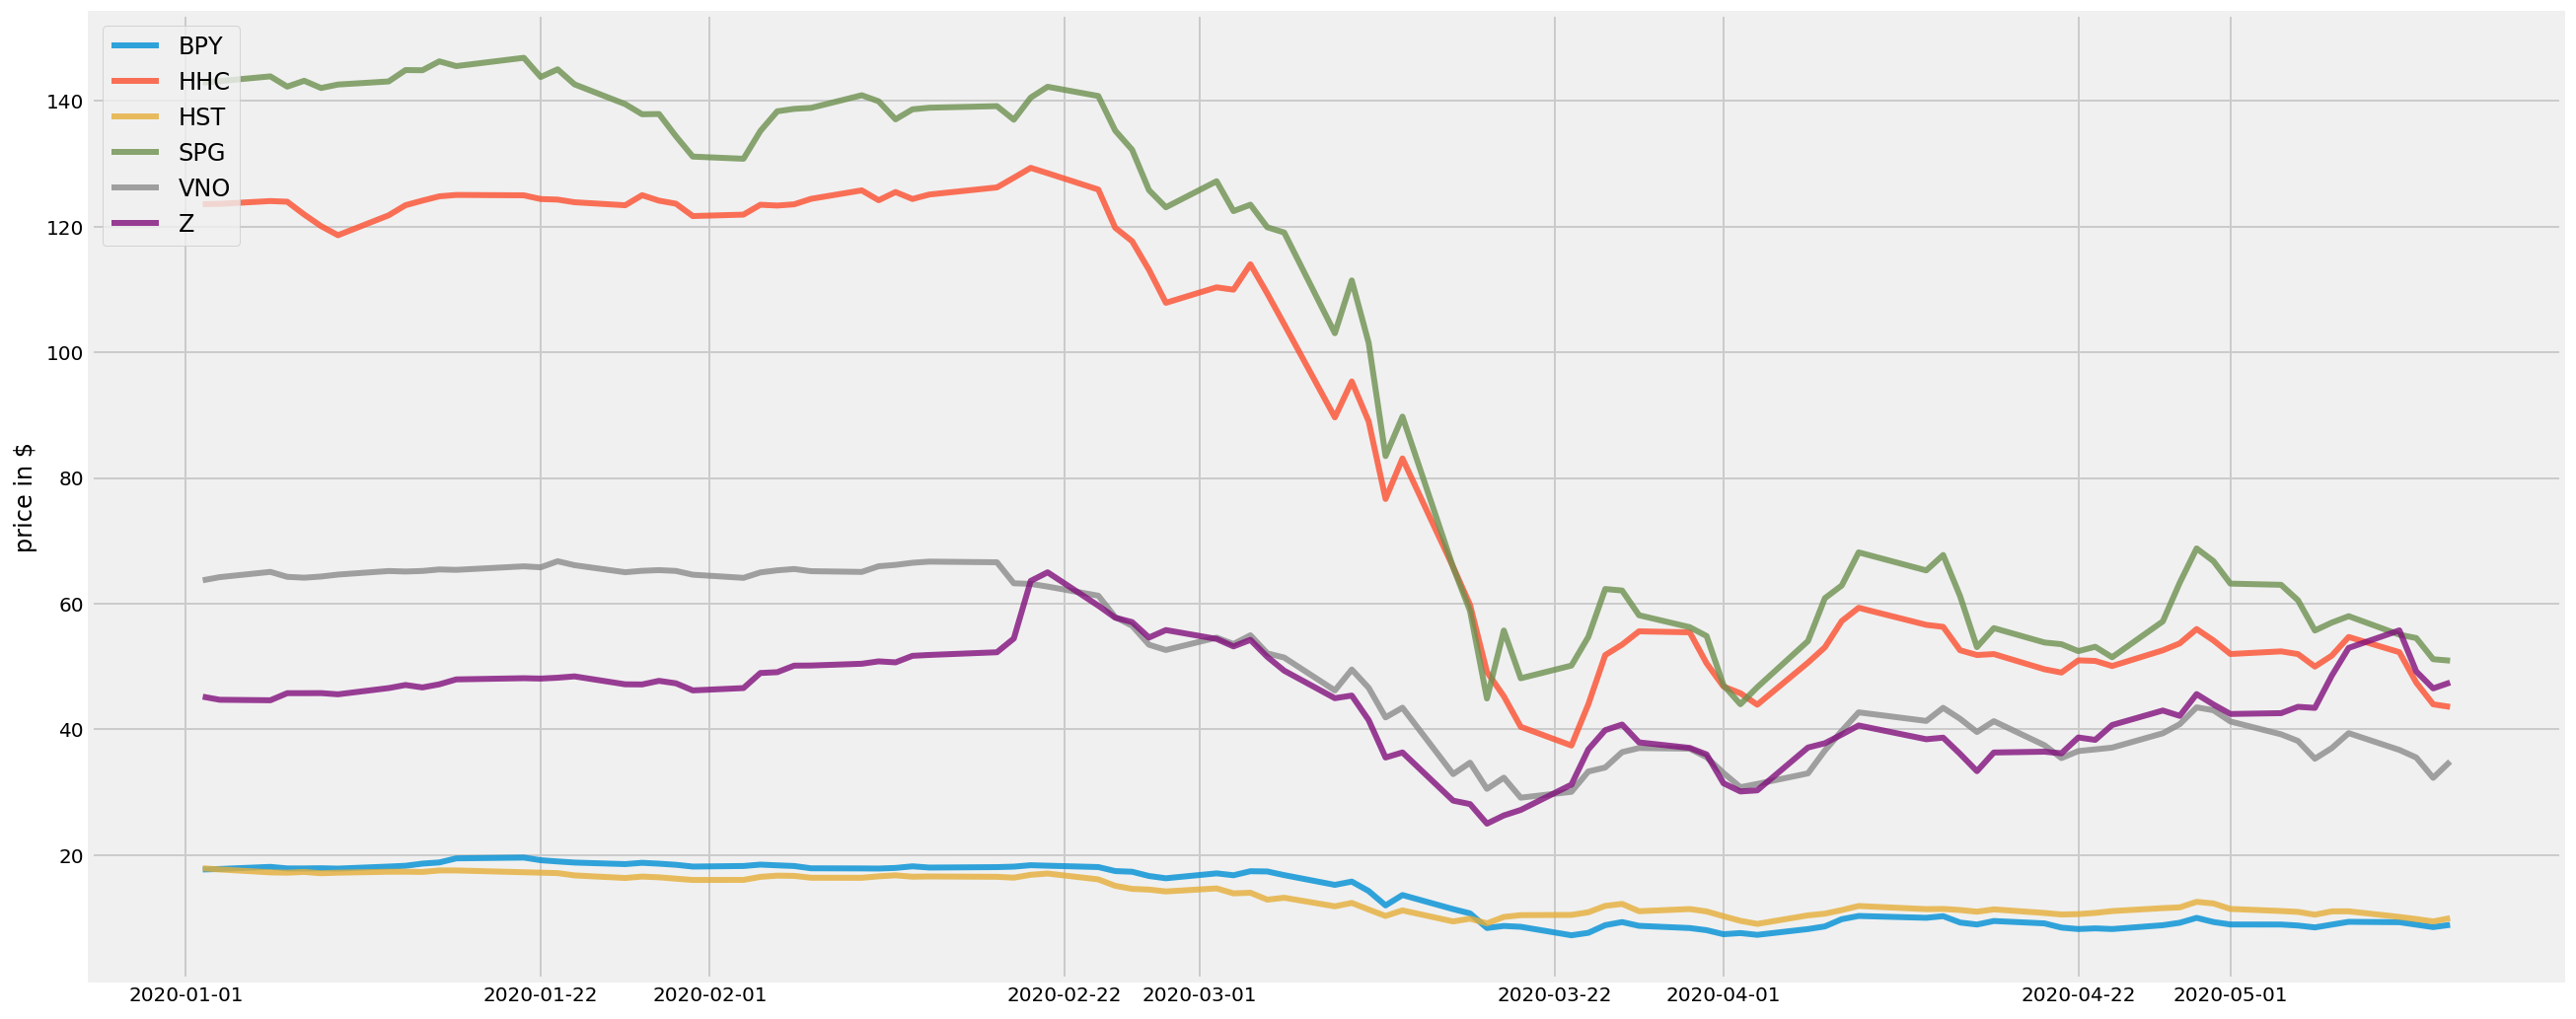

In [16]:
plt.figure(figsize=(20, 9))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

### Simple returns

Text(0, 0.5, 'daily returns')

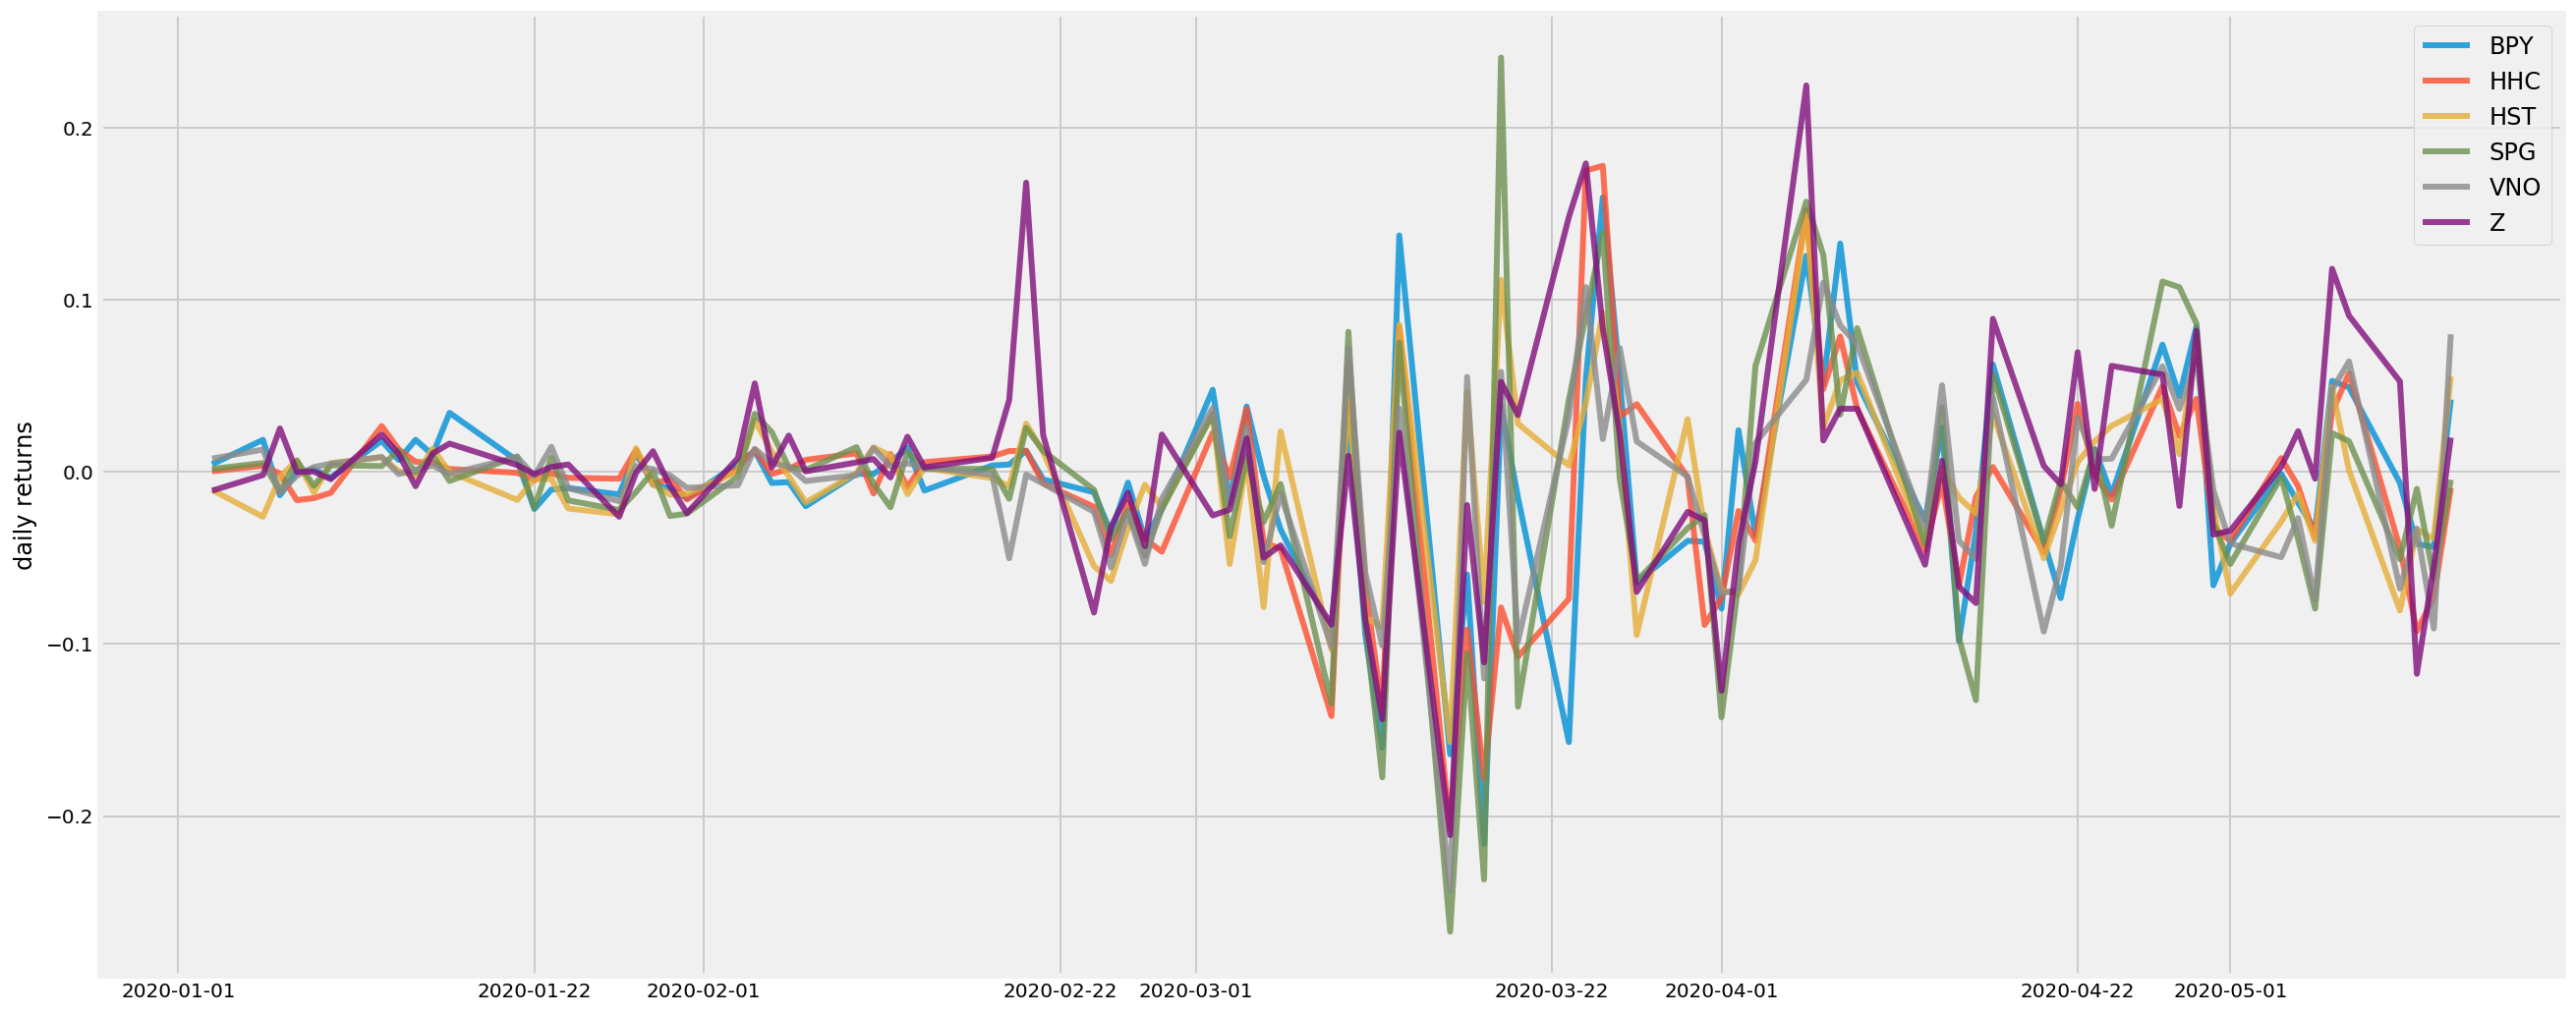

In [17]:
returns = table.pct_change()
plt.figure(figsize=(20, 9))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

### log returns

Text(0, 0.5, 'daily log returns')

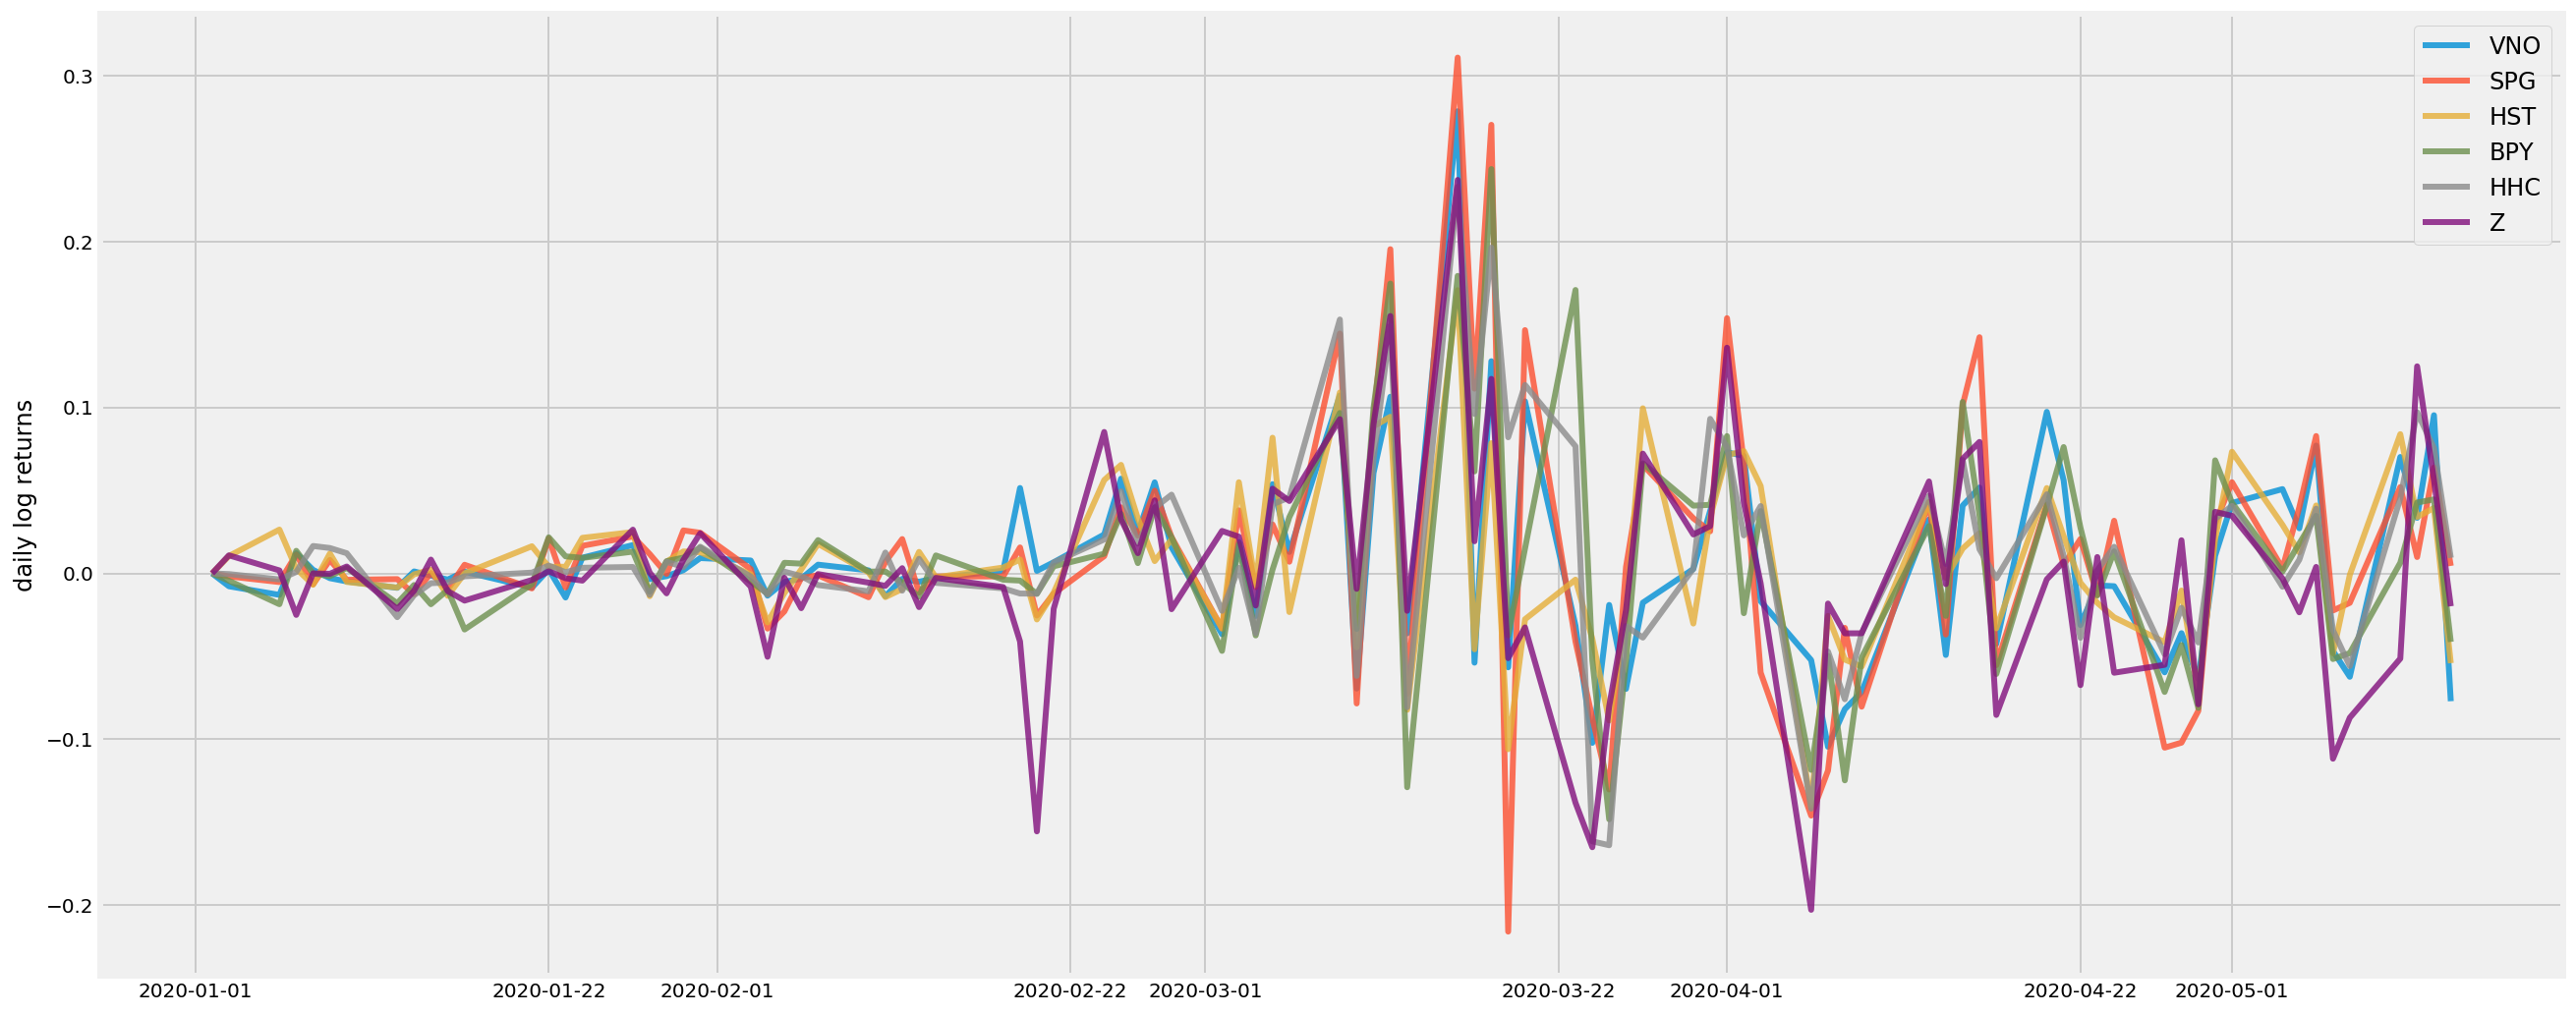

In [18]:
log = pd.DataFrame(columns = estate, index = table.index)

for i in range(len(estate)):
    log_list = []
    for j in range(len(table[estate[i]])):
        if(j+1<len(table[estate[i]])):
            log_returns =  np.log(table[estate[i]][j]) - np.log(table[estate[i]][j+1])
            log_list.append(log_returns)
            

        else:
            None
    log_list.insert(0, 0)   
    log[estate[i]] = log_list


plt.figure(figsize=(20, 9))
for c in log.columns.values:
     plt.plot(log.index, log[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily log returns')


### Normalization to 100

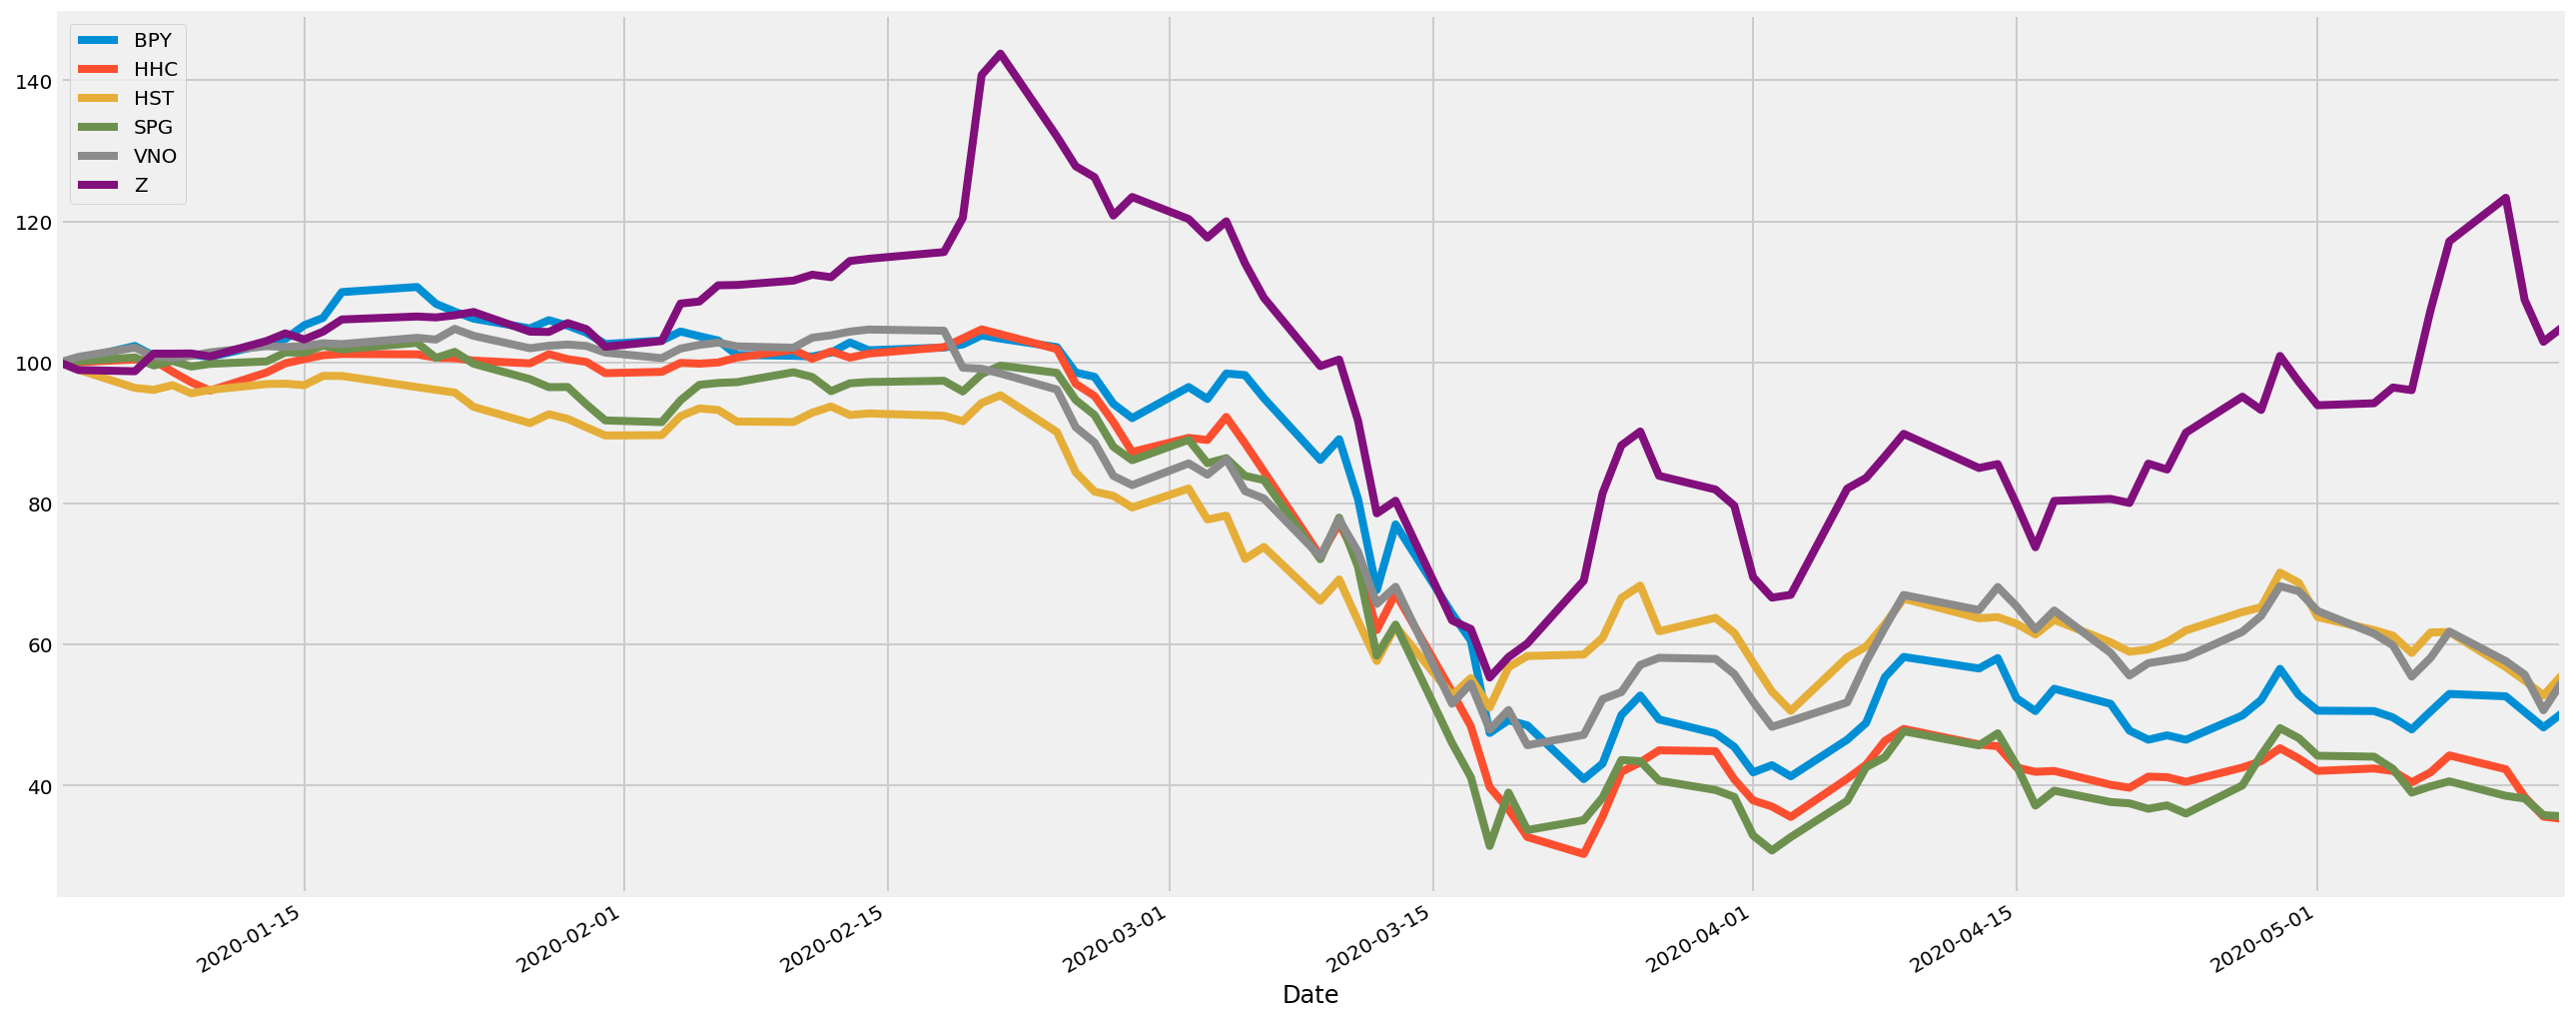

In [19]:
(table/table.iloc[0] * 100).plot(figsize = (20,9))
plt.show()

In [20]:
returns

,BPY,HHC,HST,SPG,VNO,Z
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.004430,0.000405,-0.010422,0.001792,0.007786,-0.010838
2020-01-06,0.018743,0.003640,-0.026053,0.005229,0.013028,-0.001789
2020-01-07,-0.013528,-0.000887,-0.002846,-0.011361,-0.012113,0.025314
2020-01-08,0.000000,-0.016376,0.006849,0.006577,-0.002119,0.000000
...,...,...,...,...,...,...
2020-05-08,0.049162,0.057402,0.000905,0.017895,0.064272,0.090815
2020-05-11,-0.006390,-0.044233,-0.080470,-0.050672,-0.067749,0.052671
2020-05-12,-0.041801,-0.092561,-0.033432,-0.009804,-0.032934,-0.117288


In [21]:
log.mean()*252

VNO    1.633016
SPG    2.795036
HST    1.585424
BPY    1.862962
HHC    2.823430
Z     -0.131606
dtype: float64

In [22]:
log.std()*252**0.5

VNO    0.878779
SPG    1.203463
HST    0.757396
BPY    0.963065
HHC    0.958774
Z      1.011964
dtype: float64